<a href="https://colab.research.google.com/github/mmovahed/UDLbook_ResNet/blob/main/ResNet_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

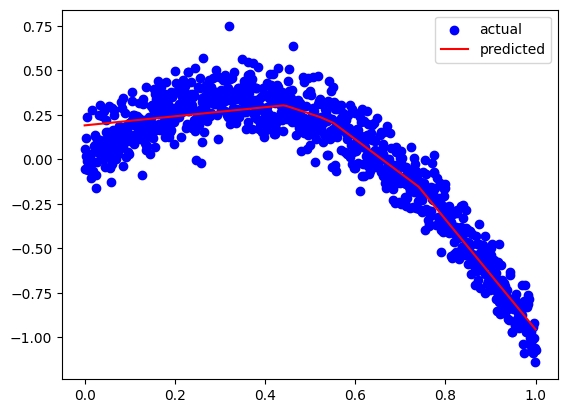

In [2]:
import tensorflow as tf
import numpy as np

# Define the differential equation to solve
def f(x, y):
    return 2*x - y

# Define the architecture of the neural network
class ResidualNN(tf.keras.Model):
    def __init__(self):
        super(ResidualNN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(16, activation='relu')
        self.dense2 = tf.keras.layers.Dense(16, activation='relu')
        self.dense3 = tf.keras.layers.Dense(1)

    def call(self, x):
        h1 = self.dense1(x)
        h2 = self.dense2(h1)
        return self.dense3(h1 + h2)

# Initialize the neural network
model = ResidualNN()

# Define the loss function
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Generate some data for training
x_train = np.linspace(0, 1, 1000)[:, None]
y_train = 2*x_train - 3*x_train**2 + np.random.normal(0, 0.1, x_train.shape)

# Train the neural network
optimizer = tf.keras.optimizers.Adam()
for i in range(1000):
    with tf.GradientTape() as tape:
        y_pred = model(x_train)
        l = loss(y_train, y_pred)
    gradients = tape.gradient(l, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

# Evaluate the trained model
x_test = np.linspace(0, 1, 1000)[:, None]
y_pred = model(x_test)

# Plot the results
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, c='b', label='actual')
plt.plot(x_test, y_pred, c='r', label='predicted')
plt.legend()
plt.show()